In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parsing the data manually

Area = [1100,1400,1425,1550,1600,1700,1750,1800,1875,2000,2100,2250,2300,2400,2450,2600,2800,2900,3000,3150,3300]
Price = [199000,245000,230000,215000,280000,295000,345000,315000,325000,360000,350000,385000,390000,425000,415000,455000,465000,495000,510000,545000,570000]

print(len(Area))
print(len(Price))

21
21


In [3]:
# writing code for linear regression
# price = theta.(area, 1), price = m(area) + c

class LinearReg:

    def __init__(self, learning_rate, iterations):
        self.alpha = learning_rate
        self.epochs = iterations
        self.theta = None
        
    def train(self, X, y):
        # first normalize :
        X = np.array(X)
        y = np.array(y)
        self.sigma_x = np.std(X)
        self.mean_x = np.mean(X)
        X = (X - self.mean_x) / self.sigma_x
        # second fit it using OLS formula
        # add an interept feature column to X
        X = X.reshape(X.shape[0], 1)
        X = np.hstack([X, np.ones((X.shape[0], 1))])
        y = y.reshape(y.shape[0], 1)
        self.theta = np.zeros((2, 1))
        m = X.shape[0]
        # ------------------------------------------------ #
        for _ in range(self.epochs):
            yhat = X @ self.theta
            decrmnt = X.T @ (yhat - y)
            self.theta -= (self.alpha * decrmnt) / m
        # ------------------------------------------------ #
        print("Trained successfully, Final parameters:")
        print (f"    normalized slope m = {self.theta[0][0]}")
        print (f"normalized intercept c = {self.theta[1][0]}")
        self.theta[1][0] = self.theta[1][0] - (self.theta[0][0]/self.sigma_x)*(self.mean_x)
        self.theta[0][0] = self.theta[0][0] / self.sigma_x
        print (f"          real slope m = {self.theta[0][0]}")
        print (f"      real intercept c = {self.theta[1][0]}")
        print(" ")
        return [self.theta[0][0], self.theta[1][0]]

    def predict(self, X):
        X = np.array(X)
        y = self.theta[0][0] * X + self.theta[1][0]
        return y

In [4]:
model = LinearReg(learning_rate=0.01, iterations=5000)
[m, c] = model.train(Area, Price)

Trained successfully, Final parameters:
    normalized slope m = 104668.37122604091
normalized intercept c = 372095.2380952352
          real slope m = 171.17327329376062
      real intercept c = 1627.3680380247533
 


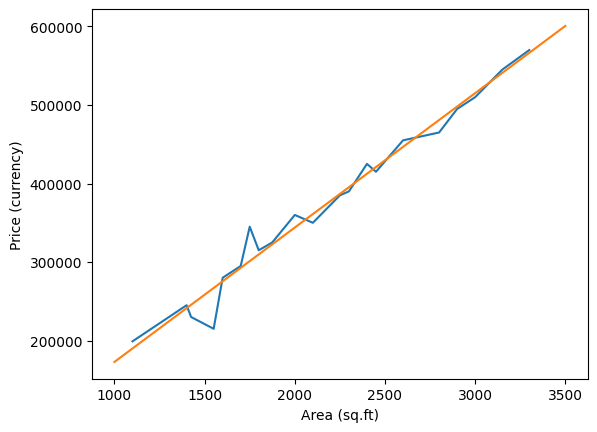

In [5]:
# ploting graph using matplotlib

plt.plot(Area, Price)
plt.xlabel("Area (sq.ft)")
plt.ylabel("Price (currency)")

fit_x = np.array([1000, 3500])
fit_y = (m * fit_x) + c
plt.plot(fit_x, fit_y)
# to plot the best fit line

plt.show()

In [6]:
print("final answer for area = 2500 :")
prediction = model.predict([2500])
print(f"{prediction[0]:.2f}")

final answer for area = 2500 :
429560.55
